In [ ]:
!pip install pyimfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.6 MB 8.4 MB/s 
  Created wheel for pyimfit: filename=pyimfit-0.11.1-cp37-cp37m-linux_x86_64.whl size=2224771 sha256=028cc3ebb9d8b6e8e3b037c7d9af7708c46a7b08c8aa5ca180fc72d3929da6fc
  Stored in directory: /root/.cache/pip/wheels/bd/e6/3e/db8f37b0cde4e1a7e1b4d671c07e5a16983bd98df337b23d91
Successfully built pyimfit


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from google.colab.patches import cv2_imshow
from numpy.fft import fft, ifft
import skimage
from skimage import restoration
import scipy
from scipy.fftpack import fftn, ifftn
from astropy.io import fits
import pyimfit

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/MakeNumberPlateReadable.jpg",0)
img2 = cv2.flip(img1,1)
print(img1)

[[251 250 250 ... 157 157 157]
 [231 230 228 ... 156 156 156]
 [189 187 184 ... 155 155 155]
 ...
 [ 82  82  81 ...  69  69  68]
 [ 82  82  80 ...  71  71  70]
 [ 82  81  80 ...  75  74  74]]


In [ ]:

temp = img1[461:600,831:970]


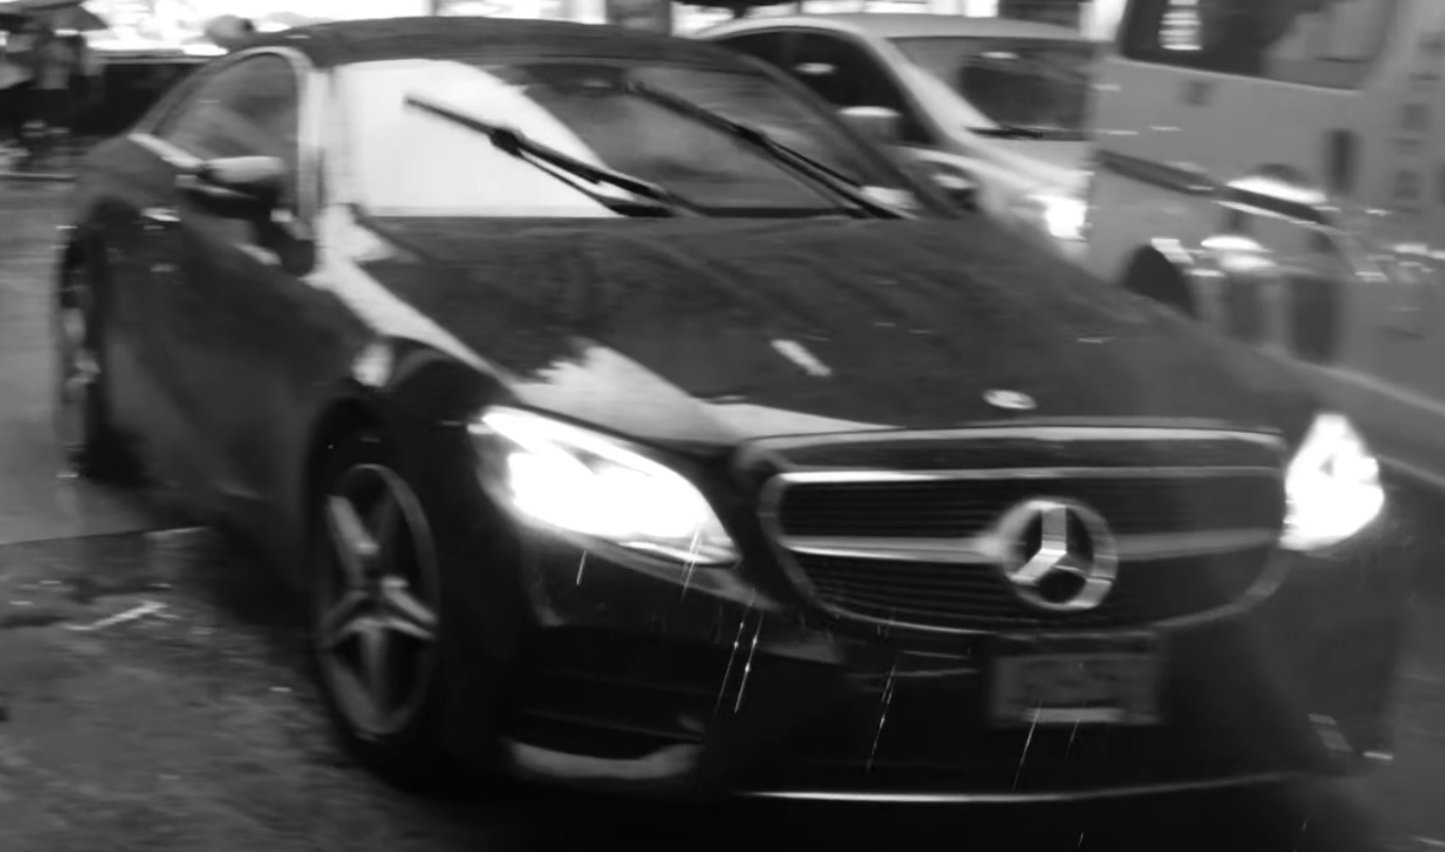

In [ ]:
cv2_imshow(img1)

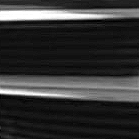

(139, 139)


In [ ]:
k = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
temp1 = cv2.filter2D(temp,-1,k)
cv2_imshow(temp1)
print(temp.shape)

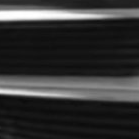

In [ ]:
cv2_imshow(temp)

In [ ]:
temp = temp/255.0
temp1 = temp1/255.0
G = fft(temp)*255
F = fft(temp1)*255

In [ ]:
print(G)
print(F)

[[5167.        +2.83106871e-14j  301.58090104-3.57516616e+02j
   -11.50774979-1.49631949e+02j ... -132.23872214+8.65279192e+01j
   -11.50774979+1.49631949e+02j  301.58090104+3.57516616e+02j]
 [5029.        +8.49320614e-14j  260.00944997-4.07993325e+02j
   -27.82395371-5.81676847e+01j ...  -81.18595832+6.90405156e+01j
   -27.82395371+5.81676847e+01j  260.00944997+4.07993325e+02j]
 [5049.        +9.37791511e-14j  230.62762131-4.55333850e+02j
   -48.66324835-7.01516316e+00j ...  -45.91975999+7.95677075e+01j
   -48.66324835+7.01516316e+00j  230.62762131+4.55333850e+02j]
 ...
 [2961.        +7.07767178e-15j  230.8032739 -3.75475039e+02j
   297.57034304+1.83976499e+01j ...  232.48185603+3.01242304e+02j
   297.57034304-1.83976499e+01j  230.8032739 +3.75475039e+02j]
 [3030.        -1.50400525e-14j  165.01340115-3.72227748e+02j
   320.39823908-1.80464034e+02j ...  111.05785808+3.71646660e+02j
   320.39823908+1.80464034e+02j  165.01340115+3.72227748e+02j]
 [3090.        +1.06165077e-14j   86.964

[[0.94946711 0.97220832 0.44594437 ... 0.58816655 0.44594437 0.97220832]
 [1.03243687 1.00627745 1.94304701 ... 1.34105126 1.94304701 1.00627745]
 [1.03782117 1.13304228 0.21274896 ... 1.25702111 0.21274896 1.13304228]
 ...
 [1.01682692 0.86239132 0.71790881 ... 0.69963911 0.71790881 0.86239132]
 [0.99934037 0.91891486 0.83741688 ... 0.78120201 0.83741688 0.91891486]
 [0.96351731 1.12165898 0.61166057 ... 0.64040379 0.61166057 1.12165898]]
(139, 139)
<class 'numpy.ndarray'>


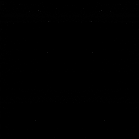

In [ ]:
H = np.divide(G,F)
H = np.real(H)
print(H)
print(H.shape)
print(type(H))
cv2_imshow(H)

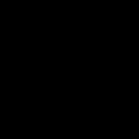

[[ 0.43210871  0.08862016  0.03089497 ...  0.02297169  0.03089497
   0.08862016]
 [ 0.03411122 -0.00517956 -0.01139654 ...  0.00389372 -0.01139654
  -0.00517956]
 [-0.00702873  0.00860539  0.00055051 ...  0.00186051  0.00055051
   0.00860539]
 ...
 [ 0.01992429 -0.00125058 -0.00223709 ...  0.0048005  -0.00223709
  -0.00125058]
 [-0.00702873  0.00860539  0.00055051 ...  0.00186051  0.00055051
   0.00860539]
 [ 0.03411122 -0.00517956 -0.01139654 ...  0.00389372 -0.01139654
  -0.00517956]]


In [ ]:

final = ifftn(H).real
cv2_imshow(final)
print(final)

In [ ]:
sup = cv2.imread("/content/drive/MyDrive/EE610-Assignments/photo-1605559424843-9e4c228bf1c2.jfif",0)
sup = sup[:1000,:1000]

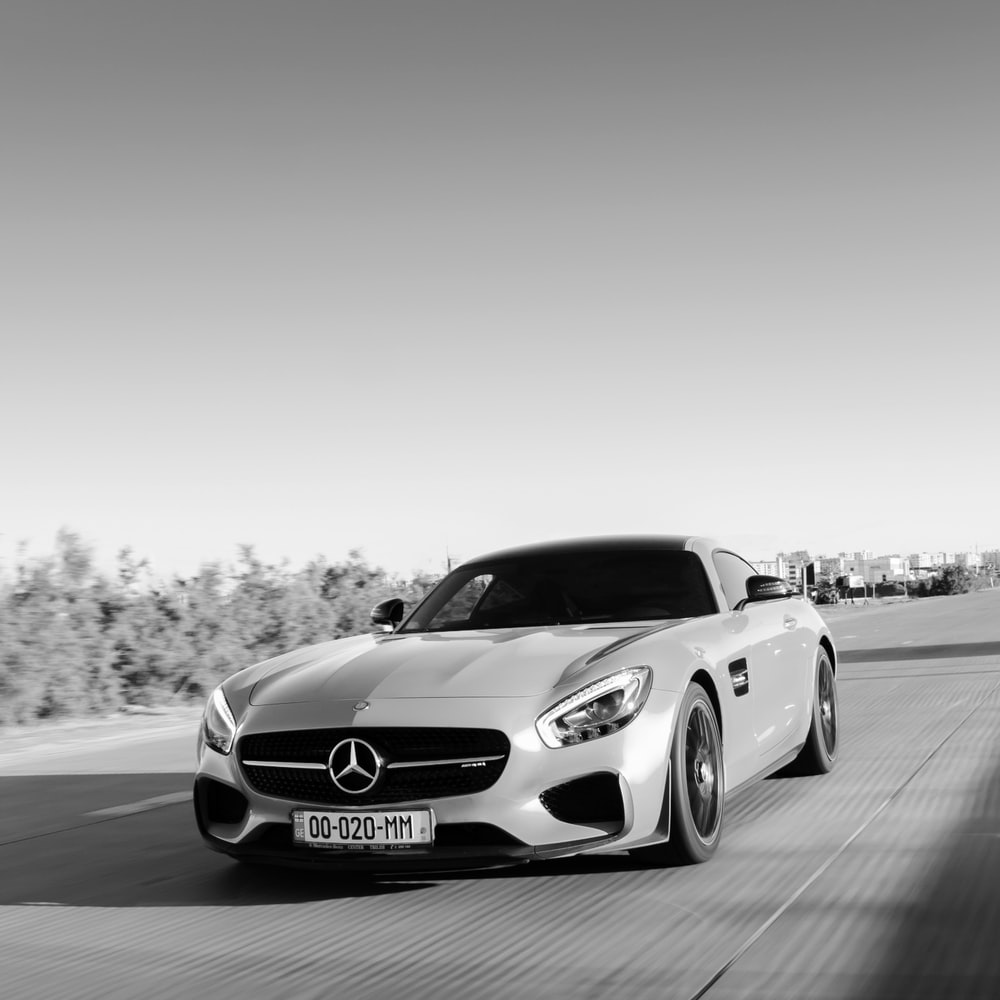

(1000, 1000)


In [ ]:
cv2_imshow(sup)
print(sup.shape)


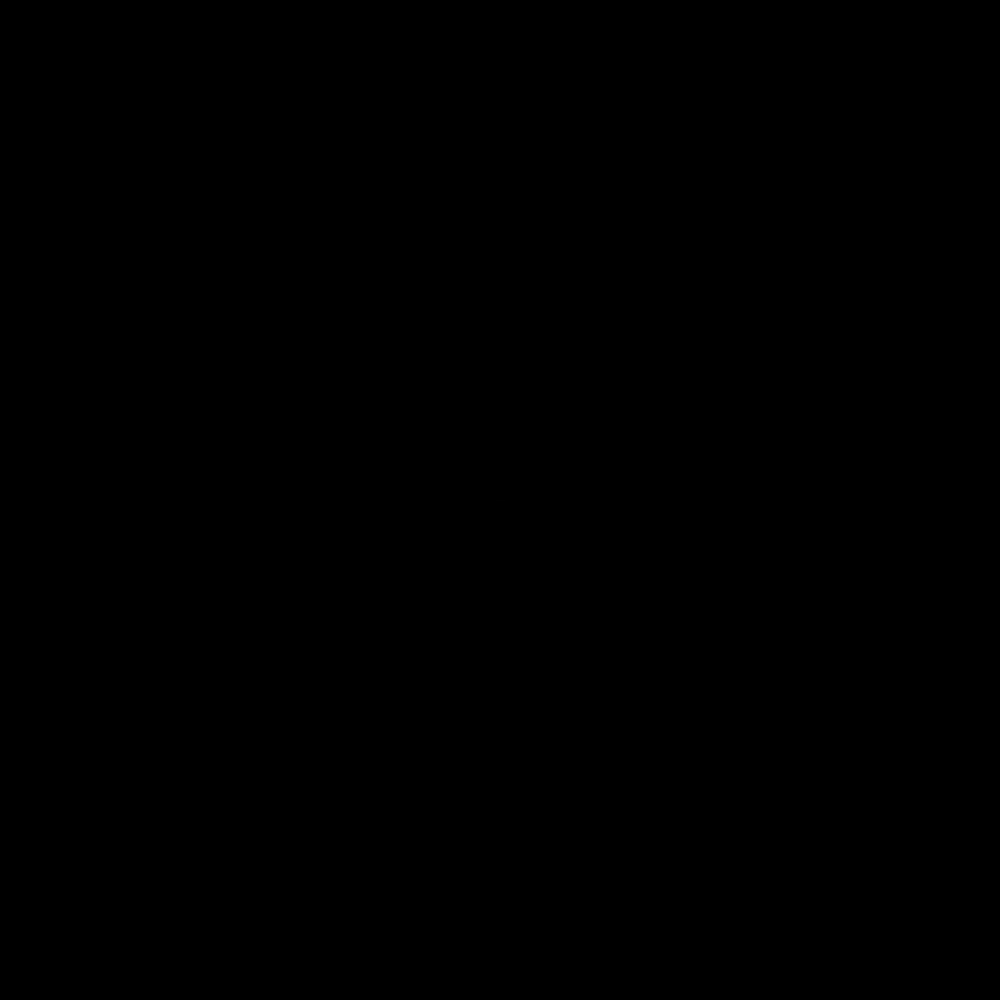

In [ ]:
k2 = motion_kernel(0,10,1000)


cv2_imshow(k2)

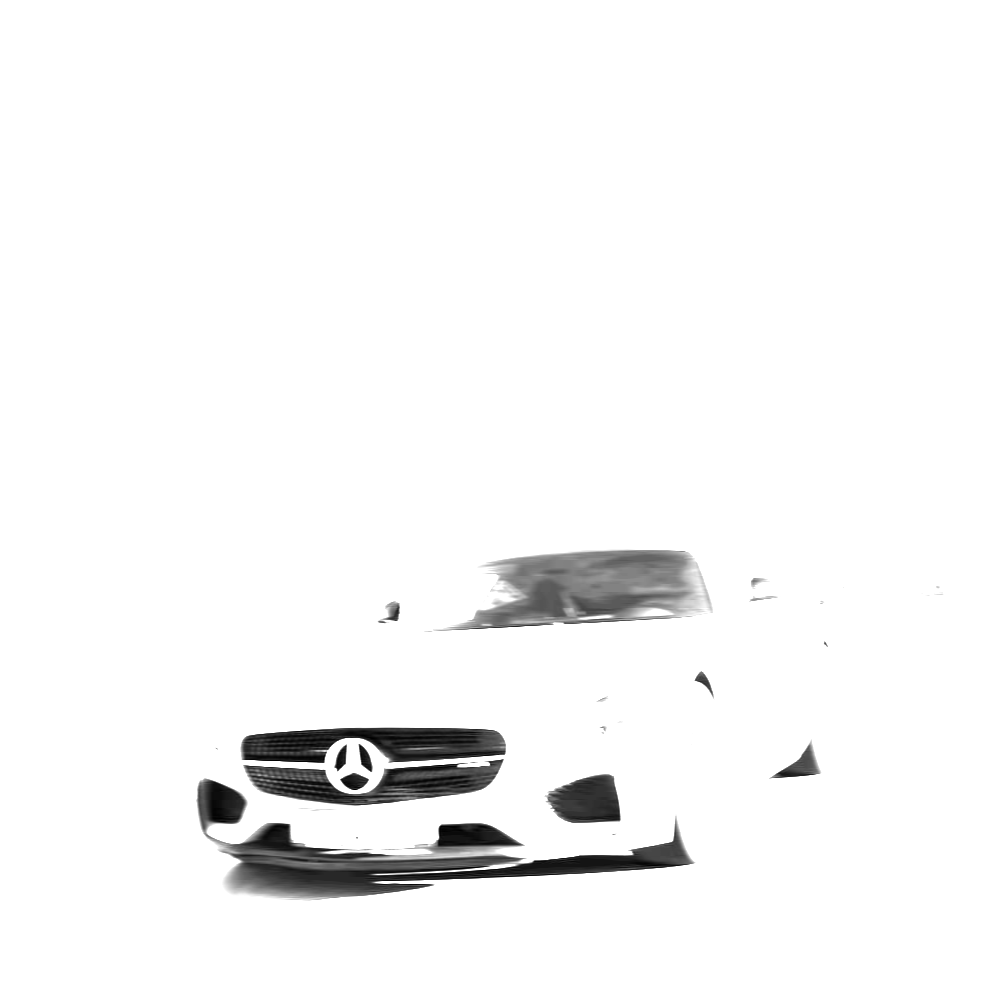

In [ ]:
mblur = cv2.filter2D(sup,-1,k2)
cv2_imshow(mblur)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


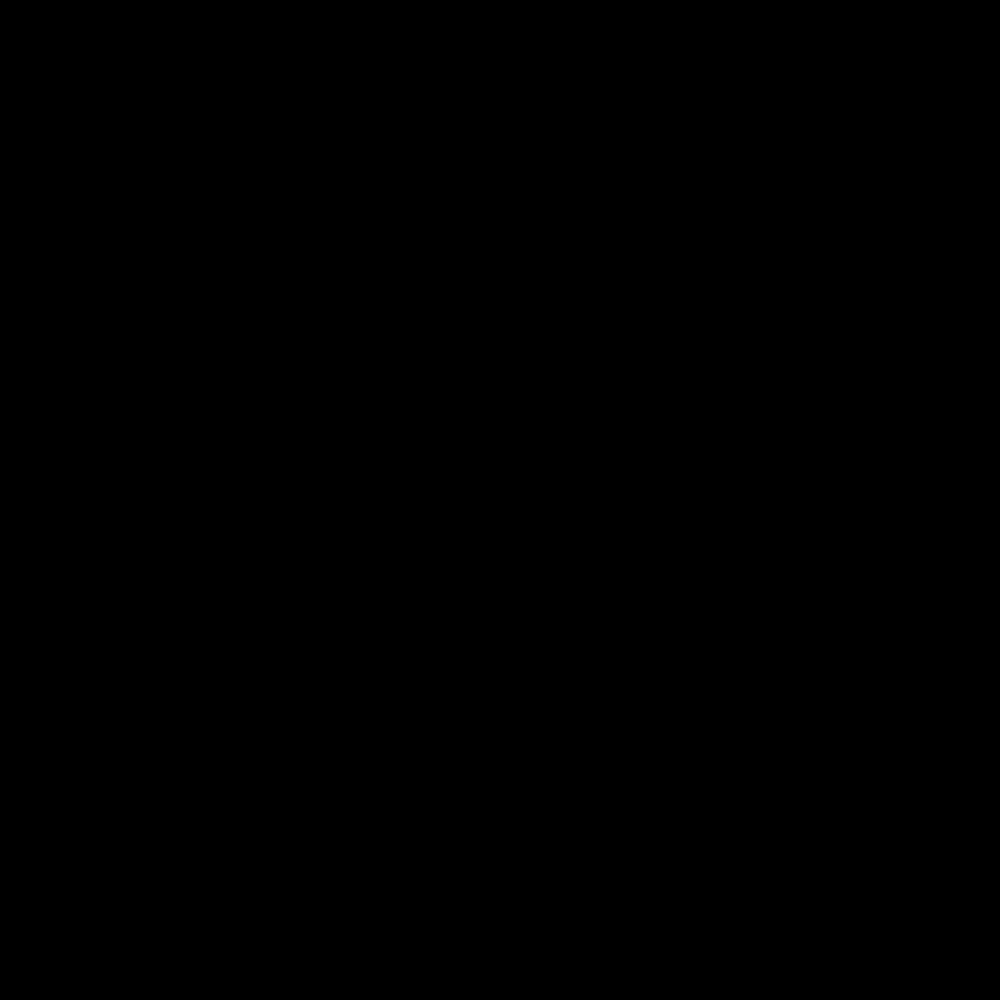

[ 0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0

In [ ]:
A = np.real(fft(mblur))
B = np.real(fft(k2)) 
C = A/B
D = ifft(C)
cv2_imshow(D)

print(k2[500,:])


In [ ]:
C = np.divide(A,B)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
Cf = ifft(C)
cv2_imshow(C)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


In [ ]:
def motion_kernel(angle, d, sz=64):
    kern = np.ones((1, d), np.float32)
    c, s = np.cos(angle), np.sin(angle)
    A = np.float32([[c, -s, 0], [s, c, 0]])
    sz2 = sz // 2
    A[:,2] = (sz2, sz2) - np.dot(A[:,:2], ((d-1)*0.5, 0))
    kern = cv2.warpAffine(kern, A, (sz, sz), flags=cv2.INTER_CUBIC)
    return kern 